<a href="https://colab.research.google.com/github/2303A52067/2303A52067-2024_STATML_Assignment/blob/main/SML_12_2067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('/content/breast_cancer_survival.csv')
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [2]:
data = data.drop(columns=["Date_of_Surgery","Date_of_Last_Visit"])
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive


In [3]:
data.isna().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [4]:
data = data.dropna()

In [5]:
data.isna().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 333
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             321 non-null    int64  
 1   Gender          321 non-null    object 
 2   Protein1        321 non-null    float64
 3   Protein2        321 non-null    float64
 4   Protein3        321 non-null    float64
 5   Protein4        321 non-null    float64
 6   Tumour_Stage    321 non-null    object 
 7   Histology       321 non-null    object 
 8   ER status       321 non-null    object 
 9   PR status       321 non-null    object 
 10  HER2 status     321 non-null    object 
 11  Surgery_type    321 non-null    object 
 12  Patient_Status  321 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 35.1+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
strs=['Patient_Status','Surgery_type','HER2 status','PR status','ER status','Histology','Tumour_Stage','Gender']
for i in strs:
    data[i]= label_encoder.fit_transform(data[i])

In [8]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,1,0,0,0,0,2,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,1
2,63,0,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,0,0,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,0,0,0,0,0,2,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,0


In [9]:
for i in data.columns:
    print(f"the set of value in \"{i}\" are {sorted(set(data[i]))}")
    print(f"range({i}): {data[i].min()} - {data[i].max()}\n")
    print(f"the length of set of {i} is {len(set(data[i]))}\nso we have {len(set(data[i]))} types of data values for {i}\n")
    print("frequency:")
    print(data[i].value_counts())
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

the set of value in "Age" are [29, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90]
range(Age): 29 - 90

the length of set of Age is 57
so we have 57 types of data values for Age

frequency:
Age
59    15
63    14
54    13
50    12
56    12
46    11
62    10
53    10
68    10
45     9
51     9
47     9
49     9
60     8
61     8
52     8
77     8
66     8
48     7
57     6
41     6
71     6
79     6
64     6
58     6
74     6
65     6
42     5
76     5
40     5
85     4
44     4
84     4
78     4
69     4
43     3
72     3
38     3
73     3
75     3
39     3
55     3
80     3
36     3
29     2
82     2
67     2
88     2
70     2
83     2
87     2
37     2
81     1
32     1
35     1
89     1
90     1
Name: count, dtype: int64
-------------------------------------------------------------------------------------------

In [10]:
data = data.drop(['PR status','ER status'], axis=1)

In [11]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,1,0,0,2,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,1,0,0,2,1
2,63,0,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,0,0,0,2,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,1,0,1,0,0


In [12]:
x=data.drop(columns=["Patient_Status"])
y=data["Patient_Status"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Accuracy of SVM:", accuracy_score(y_test, y_pred_svm))

Accuracy of SVM: 0.7692307692307693


In [16]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("Accuracy of KNN:", accuracy_score(y_test, y_pred_knn))

Accuracy of KNN: 0.7538461538461538


In [18]:
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
print("Accuracy of Logistic Regression:",accuracy_score(y_test, y_pred_log_reg))

Accuracy of Logistic Regression: 0.7692307692307693


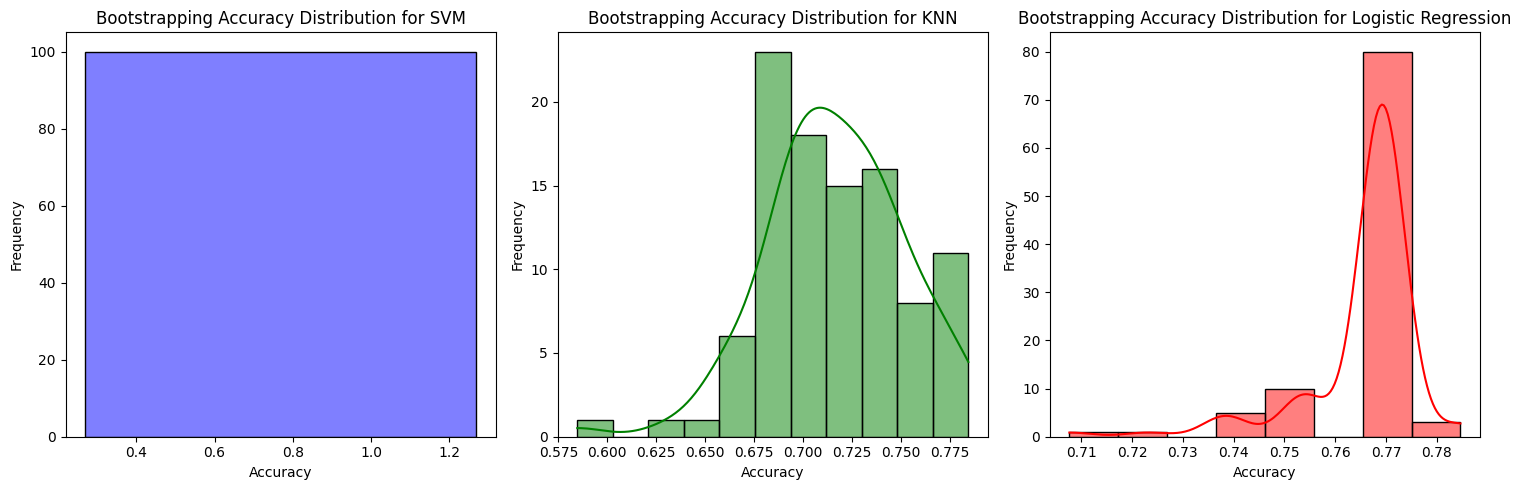

In [21]:
bootstrapped_accuracies_svm = []
bootstrapped_accuracies_knn = []
bootstrapped_accuracies_log_reg = []

# Number of bootstrap samples
n_iterations = 100

# Bootstrapping for each model
for _ in range(n_iterations):
    # Resample the training data
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train)

    # SVM Model
    svm_model.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_svm = svm_model.predict(X_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    bootstrapped_accuracies_svm.append(accuracy_svm)

    # KNN Model
    knn_model.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_knn = knn_model.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    bootstrapped_accuracies_knn.append(accuracy_knn)

    # Logistic Regression Model
    log_reg_model.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_log_reg = log_reg_model.predict(X_test)
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    bootstrapped_accuracies_log_reg.append(accuracy_log_reg)

# Plotting separate bootstrapping distributions for each model
plt.figure(figsize=(15, 5))

# SVM plot
plt.subplot(1, 3, 1)
sns.histplot(bootstrapped_accuracies_svm, kde=True, color="blue")
plt.title("Bootstrapping Accuracy Distribution for SVM")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

# KNN plot
plt.subplot(1, 3, 2)
sns.histplot(bootstrapped_accuracies_knn, kde=True, color="green")
plt.title("Bootstrapping Accuracy Distribution for KNN")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

# Logistic Regression plot
plt.subplot(1, 3, 3)
sns.histplot(bootstrapped_accuracies_log_reg, kde=True, color="red")
plt.title("Bootstrapping Accuracy Distribution for Logistic Regression")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()